In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O3','C3']
psi_dihedral=['C1','O3','C3','C4']

di_sugar=['DMU', 'DMU']
patterns1= ['DMU(*_*_)]-DMU(*_*_)', 'DMU(*_*_)-DMU(*_*_)','DMU(*_*_)]-[*]-DMU(*_*_)', 'DMU(*_*_)-[*]-DMU(*_*_)']
patterns2= ['DGlcpa1-3DGlcpb', 'DGlcpa1-3]DGlcpb', 'DGlcpa1-3[*]DGlcpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-3D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['146D', '146D', '1A14', '1ABR', '1ABR', '1AGM', '1AGM', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1AY2', '1B37', '1B5F', '1B5F', '1B5F', '1B5F', '1B5Q', '1BCS', '1BHG', '1BHG', '1BJI', '1BLF', '1BP8', '1BP8', '1BP8', '1BP8', '1BZB', '1C1Z', '1C39', '1C39', '1C3M', '1CAP', '1CF3', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CP8', '1CP8', '1CPO', '1CT1', '1CT1', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1D83', '1D83', '1DBG', '1DBO', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1DZH', '1E04', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 6 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 6 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 552 
valid torsion1 and torsion2: (552, 552)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['101.Z', '101.Z'], ['-', '-'])
(['101.M', '101.M'], ['-', '-'])
(['101.G', '101.G'], ['-', '-'])
(['101.M', '101.M'], ['-', '-'])
(['101.Z', '101.Z'], ['-', '-'])
(['301.P', '301.P'], ['-', '-'])
(['510.A', '510.A'], ['-', '-'])
(['513.A', '513.A'], ['-', '-'])
(['511.A', '511.A'], ['-', '-'])
(['512.A', '512.A'], ['-', '-'])
(['304.B', '304.B'], ['-', '-'])
(['603.C', '603.C'], ['-', '-'])
(['303.B', '303.B'], ['-', '-'])
(['302.D', '302.D'], ['-', '-'])
(['602.C', '602.C'], ['-', '-'])
(['302.B', '302.B'], ['-', '-'])
(['604.C', '604.C'], ['-', '-'])
(['301.B', '301.B'], ['-', '-'])
(['301.D', '301.D'], ['-', '-'])
(['203.A', '203.A'], ['-', '-'])
(['203.B', '203.B'], ['3H4', '3H4'])
(['606.A', '606.A'], ['-', '-'])
(['505.B', '505.B'], ['-', '-'])
(['506.B', '506.B'], ['3H4', '3H4'])
(['505.A', '505.A'], ['-', '-'])
(['506.A', '506.A'], ['3H4', '3H4'])
(['504.A', '504.A'], ['-', '-'])
(['503.A', '503.A'], ['-', '-'])
(['502.C', '502.C'], ['-', '-'])
(['505.B', '505.B'], ['-', '-']

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//5x19.pdb Z DMU 101 C1
../../pdbs//5x19.pdb Z DMU 101 O3
30821 30850
No connection found between 30821 and 30850
0
../../pdbs//5x19.pdb M DMU 101 C1
../../pdbs//5x19.pdb M DMU 101 O3
29744 29773
No connection found between 29744 and 29773
1
../../pdbs//3x2q.pdb G DMU 101 C1
../../pdbs//3x2q.pdb G DMU 101 O3
29380 29409
No connection found between 29380 and 29409
2
../../pdbs//3x2q.pdb M DMU 101 C1
../../pdbs//3x2q.pdb M DMU 101 O3
29682 29711
No connection found between 29682 and 29711
3
../../pdbs//3x2q.pdb Z DMU 101 C1
../../pdbs//3x2q.pdb Z DMU 101 O3
30768 30797
No connection found between 30768 and 30797
4
../../pdbs//3x2q.pdb P DMU 301 C1
../../pdbs//3x2q.pdb P DMU 301 O3
30151 30180
No connection found between 30151 and 30180
5
../../pdbs//4gey.pdb A DMU 510 C1
../../pdbs//4gey.pdb A DMU 510 O3
3427 3453
No connection found between 3427 and 3453
6
../../pdbs//4gey.pdb A DMU 513 C1
../../pdbs//4gey.pdb A DMU 513 O3
3518 3543
No connection found between 3518 and 3543
7


In [13]:
output_df.to_csv('DGlcpa1-3DGlcpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpa1-3DGlcpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,5x19.pdb,Z DMU 101 C2 C1 O3 C3 is,Z DMU 101 C1 O3 C3 C4 is,295.0043,131.896,"([DMU(101_Z_), DMU(101_Z_)], [114.01, 114.01])",DMU(101_Z_)-DMU(101_Z_),DGlcpa1-3DGlcpb6-C10O1,"([101.Z, 101.Z], [-, -])"
1,5x19.pdb,M DMU 101 C2 C1 O3 C3 is,M DMU 101 C1 O3 C3 C4 is,302.5363,128.626,"([DMU(101_M_), DMU(101_M_)], [85.96, 85.96])",DMU(101_M_)-DMU(101_M_),DGlcpa1-3DGlcpb6-C10O1,"([101.M, 101.M], [-, -])"
2,3x2q.pdb,G DMU 101 C2 C1 O3 C3 is,G DMU 101 C1 O3 C3 C4 is,298.5531,213.328,"([DMU(101_G_), DMU(101_G_)], [137.96, 137.96])",DMU(101_G_)-DMU(101_G_),DGlcpa1-3DGlcpb6-C10O1,"([101.G, 101.G], [-, -])"
3,3x2q.pdb,M DMU 101 C2 C1 O3 C3 is,M DMU 101 C1 O3 C3 C4 is,301.6725,141.306,"([DMU(101_M_), DMU(101_M_)], [54.8, 54.8])",DMU(101_M_)-DMU(101_M_),DGlcpa1-3DGlcpb6-C10O1,"([101.M, 101.M], [-, -])"
4,3x2q.pdb,Z DMU 101 C2 C1 O3 C3 is,Z DMU 101 C1 O3 C3 C4 is,300.8613,136.170,"([DMU(101_Z_), DMU(101_Z_)], [74.13, 74.13])",DMU(101_Z_)-DMU(101_Z_),DGlcpa1-3DGlcpb6-C10O1,"([101.Z, 101.Z], [-, -])"
...,...,...,...,...,...,...,...,...,...
547,3fyi.pdb,A DMU 574 C2 C1 O3 C3 is,A DMU 574 C1 O3 C3 C4 is,300.7542,125.795,"([DMU(574_A_), DMU(574_A_)], [71.5, 71.5])",DMU(574_A_)-DMU(574_A_),DGlcpa1-3DGlcpb6-C10O1,"([574.A, 574.A], [-, -])"
548,3fyi.pdb,B DMU 11 C2 C1 O3 C3 is -,B DMU 11 C1 O3 C3 C4 is 1,314.2720,119.212,"([DMU(11_B_), DMU(11_B_)], [74.24, 74.24])",DMU(11_B_)-DMU(11_B_),DGlcpa1-3DGlcpb6-ROH,"([11.B, 11.B], [-, -])"
549,3fyi.pdb,A DMU 573 C2 C1 O3 C3 is,A DMU 573 C1 O3 C3 C4 is,314.3577,110.109,"([DMU(573_A_), DMU(573_A_)], [37.05, 37.05])",DMU(573_A_)-DMU(573_A_),DGlcpa1-3DGlcpb6-C10O1,"([573.A, 573.A], [-, -])"
550,3fyi.pdb,D DMU 1011 C2 C1 O3 C3 is,D DMU 1011 C1 O3 C3 C4 is,330.6227,112.585,"([DMU(1011_D_), DMU(1011_D_)], [69.46, 69.46])",DMU(1011_D_)-DMU(1011_D_),DGlcpa1-3DGlcpb6-ROH,"([1011.D, 1011.D], [-, -])"


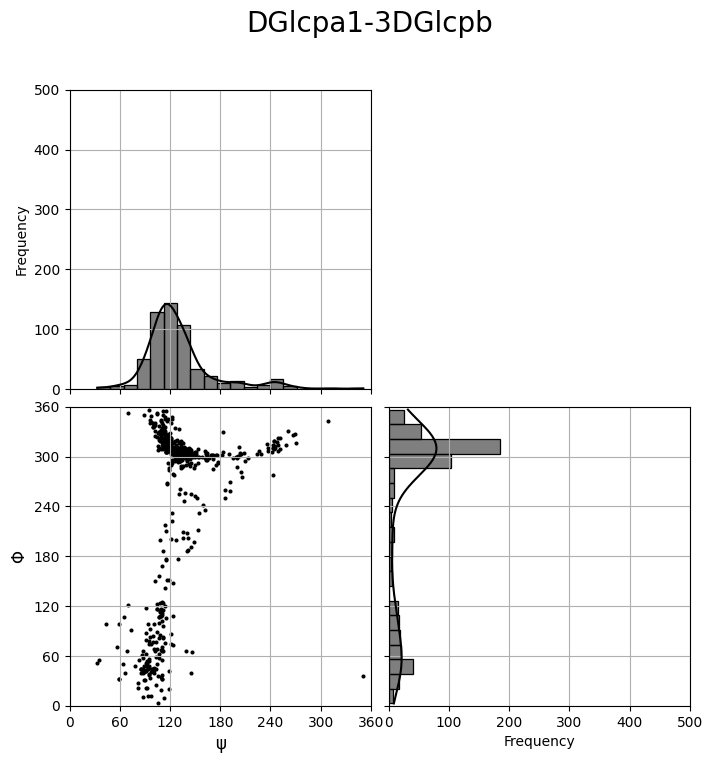

In [17]:
instant1.plot(torsions=instant1.torsions, title='DGlcpa1-3DGlcpb',max_histogram_scale=500,step_histogram_tick=100)